In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BIDI4.SA', 'ALPA4.SA', 'MGLU3.SA']

In [3]:
df = pd.DataFrame()
for t in tickers:
    df[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-1')['Adj Close']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2019-01-02 to 2020-03-09
Data columns (total 3 columns):
BIDI4.SA    293 non-null float64
ALPA4.SA    293 non-null float64
MGLU3.SA    293 non-null float64
dtypes: float64(3)
memory usage: 9.2 KB


## Normalization

In [5]:
df.iloc[0]

BIDI4.SA     6.207135
ALPA4.SA    13.978415
MGLU3.SA    22.766758
Name: 2019-01-02 00:00:00, dtype: float64

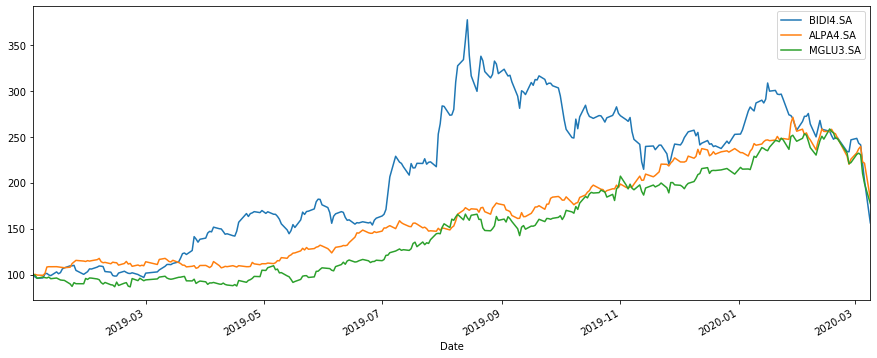

In [6]:
(df / df.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

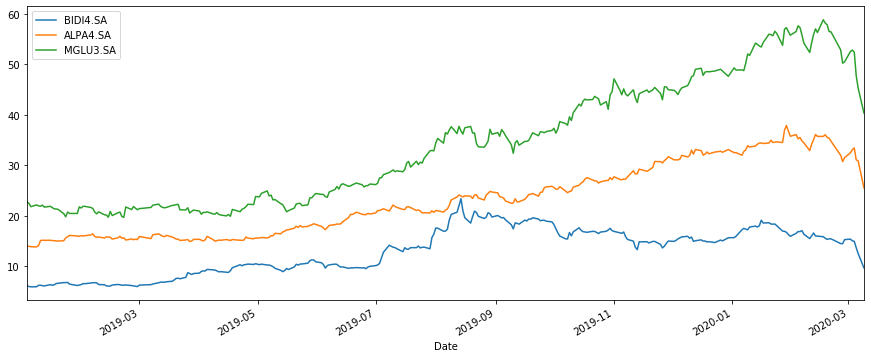

In [7]:
df.plot(figsize=(15,6))
plt.show()

## Search methods

In [8]:
df.loc['2019-12-30']
df.iloc[0]

BIDI4.SA     6.207135
ALPA4.SA    13.978415
MGLU3.SA    22.766758
Name: 2019-01-02 00:00:00, dtype: float64

## Simple Return

In [17]:
returns = (df/df.shift(1)) - 1
returns.head()

,BIDI4.SA,ALPA4.SA,MGLU3.SA
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.028889,0.001714,-0.010702
2019-01-04,-0.012266,-0.007416,-0.030435
2019-01-07,0.003963,-0.002299,0.015525
2019-01-08,0.047633,0.019585,-0.008054


In [10]:
weights = np.array([0.31,0.33,0.35])

In [11]:
np.dot(returns, weights)

array([            nan, -1.21355590e-02, -1.69018079e-02,  5.90341559e-03,
        1.84103165e-02,  2.30401878e-02, -5.98321579e-04, -8.83043669e-03,
        1.56507436e-02, -1.08689495e-02, -9.52272662e-04,  1.03946661e-02,
        1.81859176e-03, -6.41421313e-03,  1.67420476e-03,  2.32499429e-02,
       -1.50282809e-02, -1.51088911e-02,  2.58036997e-02,  3.05516917e-03,
        1.34693261e-02,  2.69625416e-04,  6.11665599e-03,  4.20449307e-03,
       -2.22438223e-02, -1.04416539e-02, -7.65164668e-03, -1.59205715e-02,
       -7.08655961e-03, -1.07475082e-02,  2.01949622e-02, -1.11616519e-02,
        2.10829252e-02,  5.17386750e-03, -2.60898595e-02, -1.75949425e-03,
        2.97342530e-02, -9.56347664e-03,  2.92184333e-03, -5.69582988e-03,
       -1.01221701e-02,  3.18026283e-02, -6.50997471e-04,  3.00549712e-02,
        1.82188594e-02, -5.53311476e-03, -8.27001561e-03, -3.68580675e-03,
        1.02202559e-02,  4.15070299e-03,  8.46620598e-03,  9.61209737e-03,
        2.49349204e-03, -

In [12]:
annual_return = returns.mean() * 250
annual_return

BIDI4.SA    0.556653
ALPA4.SA    0.579631
MGLU3.SA    0.583268
dtype: float64

In [13]:
np.dot(annual_return, weights)

0.5679845221377197

In [14]:
portf_1 = '{}% ao ano'.format(round(np.dot(annual_return, weights),5) * 100)
portf_1

'56.798% ao ano'

In [15]:
weights_2 = np.array([0.35,0.31,0.33])

In [16]:
portf_2 = '{}% ao ano'.format(round(np.dot(annual_return, weights_2),5) * 100)
print(' pf1: {}\n pf2: {}'.format(portf_1,portf_2))

 pf1: 56.798% ao ano
 pf2: 56.699% ao ano
